In [1]:
%matplotlib inline
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

c:\users\chris huang\miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\chris huang\miniconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\chris huang\miniconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\chris huang\miniconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\chris huang\miniconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\chris huang\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    sel

In [2]:

h_d = 250 #pc
l_d = 2250 #pc
h_td = 700 #pc
l_td = 3500 #pc
q = .8
n = 3.5

A_n = 70 #pc
A_s = 170 #pc
lambda_n = 6.3 #kpc
lambda_s = 7.8 #kpc
r_s = 14 #kpc
a_0 = 1000 #pc
p_0 = .14
def d(r,z):
    return np.sqrt(r**2 + (z/q)**2)
def p_s(r,z):
    a_0 = 1000 #pc
    return 1/(a_0**n + d(r,z)**n)
def dist(mag): #returns in PC
    exponent = (mag - 4.2)/5.
    lhs = 10**exponent
    lhs = float(lhs) * 10.
    return lhs
def z_w(r):
    r_kpc = r / 1000.
    r_n = r_s - .25*lambda_s - .25*lambda_n
    if r_kpc < r_n + .25 * lambda_n:
        A_w = A_n
        phi_w = r_n - int((r_n - .25*lambda_n)/lambda_n) * lambda_n - .25 * lambda_s
        lambda_w = lambda_n
        
    else:
        A_w = A_s
        phi_w = r_s - int((r_s - .75*lambda_s)/lambda_s) * lambda_s - .75 * lambda_s
        lambda_w = lambda_s
    return A_w * np.sin(2*np.pi*(r_kpc-phi_w)/lambda_w)
def test(r):
    r_kpc = r / 1000.
    if r_kpc < 12.05:
        return 70*np.sin(2*np.pi*(r_kpc-2.225)/6.3)
    else:
        return 170*np.sin(2*np.pi*(r_kpc-.35)/7.8)


In [3]:
t = np.arange(15,23, .001)
radius = [dist(i) for i in t.tolist() ]

#print(radius)
spheriod = [p_s(r, 1800) for r in radius]
#print(spheriod)

In [4]:
v1 = [z_w(r) for r in radius]
#print(v1)
v2 = [test(r) for r in radius]
#print(v2)

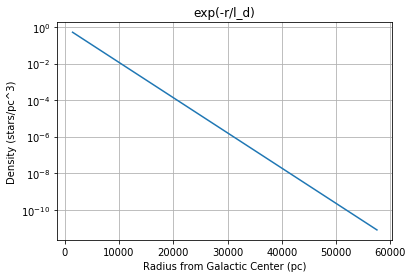

In [9]:
def p_d(r,z):
    return np.exp(-r/l_d) * np.exp(-abs(z-z_w(r))/h_d)
rad = radius
exp1 = [np.exp(-r/l_d) for r in rad]
exp2 = [np.exp(-abs(0-z_w(r))/h_d) for r in rad]
exp3 = [p_d(r,0) for r in rad]
plt.plot(rad, exp1)
plt.grid()
plt.yscale("log")
plt.title("exp(-r/l_d)")
plt.xlabel("Radius from Galactic Center (pc)")
plt.ylabel("Density (stars/pc^3)")
plt.show()


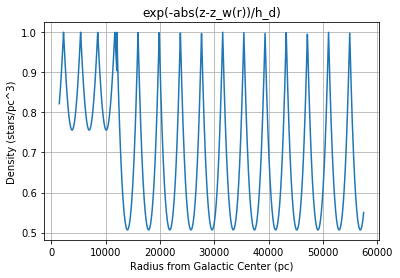

In [6]:
plt.plot(rad,exp2)
plt.grid()
plt.title("exp(-abs(z-z_w(r))/h_d)")
plt.xlabel("Radius from Galactic Center (pc)")
plt.ylabel("Density (stars/pc^3)")
plt.show()

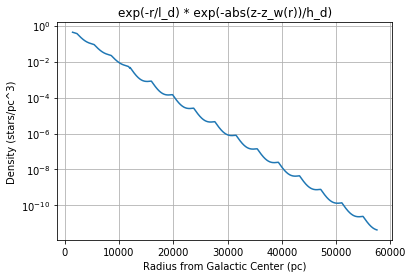

In [7]:
plt.plot(rad,exp3)
plt.grid()
plt.title("exp(-r/l_d) * exp(-abs(z-z_w(r))/h_d)")
plt.yscale("log")
plt.xlabel("Radius from Galactic Center (pc)")
plt.ylabel("Density (stars/pc^3)")
plt.show()

In [15]:
dist(20)

14454.39770745928

In [16]:
dist(20.5)

18197.008586099844